# London Underground - Statistical Analysis Uncovering Usage Patterns. Comparing Residential VS Non-Residential Areas

### 1. Introduction
This document uses the London Underground Exits dataset, focusing on station Exits during peak times of the day. This document covers the following:
 - Analysis of the dataset, outlining key features and trends. e.g. Means, Medians, Quartiles etc.
 - Visual statistical information derived from analysis, with written interpretation of the trends.
 - Using a combination of Analysis and Statistics, the data will be manipulated to provide additional 
 information not present in the current dataset. e.g. categorising each area in accordance to it's function. the categories are:
     - Work
     - Residential
     - Other

## Part 1 - Introduction: Reading the dataset.

To gain better understanding of the exits dataset, this document will mainly focus on the peak operating hours of each station as they tend to provide the strongest patterns. The increased demand of underground stations gives us more datapoints to work with. 

Peak hours selected:
 - 7-9AM = AMPeak
 - 4-6PM = PMPeak
 
since this is a relatively small dataset, no sampling will be required.
Important note:
 - each hour is presented in the following format: H05 = 5AM, H06 = 6AM, H16 = 4PM etc.
 
Below is a dataframe extracted from hourlyExits.csv , the data values (data points) indicate the amount of exits made in that hour. e.g. in Acton Town at 9AM, 448 Exits were made. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# reading hourlyexits from csv and saving it into exits.
exits = pd.read_csv('hourlyExits.csv',index_col='Station')

#displaying the result.
exits

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


## Part 2 - Creating a more tailored, peak-time dataframe

#### In this segment and as mentioned previously, we will be looking at primarily the peak time operation of each of the stations. 

 - AMPeak will represent the sum of exits for each station during the morning peak hours (7-9AM).
 - PMPeak will represent the sum of exits for each station during the evening peak hours (4-6PM).
 - DailyExits will represent the sum of exits for each station over the course of the entire day.
 - AMProportion will be the AMPeak over the total number of exits per day as a percentage (%).
 - PMProportion will be the PMPeak over the total number of exits per day as a percentage (%).
 - Difference is comparing the AMPeak and the PMPeak in terms of number of exits, where PMPeak is subtracted from AMPeak.
 - Ratio will compare the AMProportion to the PMProportion where AMProportion is divided by the PMProportion.
 
Below are the first 15 results of the newly created dataframe:

In [7]:
# creating a daily count calculation.
daily_count = exits.sum(axis = 1)
# calculating the sum of all the AM hours.
am_peak_count = exits.H07 + exits.H08 + exits.H09
# calculating the sum of all the PM hours.
pm_peak_count = exits.H16 + exits.H17 + exits.H18
# creating a peak_counts dataframe using pandas libraries.
peak_counts = pd.DataFrame()

# assigning the data to the peak_counts dataframe. Also using the calculations 
# previously made to calculate difference, proportions and ratio.
peak_counts = peak_counts.assign(AMPeak = am_peak_count,
                                 
                                 PMPeak = pm_peak_count,
                                 
                                 DailyExits = daily_count,
                                 
                                 AMProportion = lambda x: round((am_peak_count / daily_count) * 100, 2),
                                 
                                 PMProportion = lambda x: round((pm_peak_count / daily_count) * 100, 2),
                                 
                                 Difference = lambda x: am_peak_count - pm_peak_count,
                                 
                                 Ratio = lambda x: round(am_peak_count / pm_peak_count, 2))

# displaying the first 15 of 256 stations, in no particular order.
peak_counts.head(15)

,AMPeak,PMPeak,DailyExits,AMProportion,PMProportion,Difference,Ratio
Station,,,,,,,
Acton Town,1970,2628,9362,21.04,28.07,-658,0.75
Aldgate,7408,2992,16136,45.91,18.54,4416,2.48
Aldgate East,7618,3803,21206,35.92,17.93,3815,2.00
Alperton,856,1847,5118,16.73,36.09,-991,0.46
Amersham,424,1465,3905,10.86,37.52,-1041,0.29
Angel,9525,6303,30303,31.43,20.80,3222,1.51
Archway,2190,4106,13935,15.72,29.47,-1916,0.53
Arnos Grove,770,2272,6764,11.38,33.59,-1502,0.34
Arsenal,397,1182,3941,10.07,29.99,-785,0.34


This dataframe provides the basis for which we can use to visualise data and gain better understanding of usage. This already tells us a lot about what stations are generally busier during peak times in comparison to others. 

It is important to have both the number of exits as well as the proportions of exits to gain a better understanding of the data presented. here are a few reasons why:

 - #### Numbers(here referring to AMPeak, PMPeak, DailyExits and Difference columns) are relative to each station, and thus could tell us the following about each station:
 
     - The size of the station: whether the station is large or small to accomodate for the amount of footfall during peak times.
     - The amount of overlapping lines at a specific station: if people use it to switch from one line to another, e.g. bakerloo line to picadilly line.
     - The level of popularity of each station (busyness): could potentially be linked to the location of the station.
     - Station functionality: Whether the station also doubles as an overground station linking cities and towns outside of London. e.g. Waterloo, Paddington.


 - #### Proportions(here referring to AMProportion, PMProportion and Ratio columns) can be compared across all stations, and thus could tell us the following:
 
     - The type of area the station is in: for example, a high amount of exits during AMProportion in comparison to the PMProportion can mean the area is more industrial consisting of office spaces whereas a pattern where there is a higher PMProportion than AMProportion, we could say that area is residential. Taking an example from the above dataframe, Aldgate seems to be more of an industrial area, which it is. 
     - Since ratios and proportions are unaffected by the amount of exits, stations can be cross-referenced for a bigger picture: e.g. Overall, we could say London is more of an industrial city. Overall, London underground stations have higher traffic in the morning than in the evening.
     
     
### Below I have manipulated the dataframe to highlight the 15 busiest stations during the AM peak hours: 

In [8]:
# Creating a pivot table with select columns, which sorts AMPeak from highest, then only selecting the top 15 from 256 stations.
peak_counts.pivot_table(index = 'Station', values = (['AMPeak', 'PMPeak', 'Difference'])).sort_values(by = 'AMPeak', ascending = False).head(15)

,AMPeak,Difference,PMPeak
Station,,,
Bank & Monument,61116.0,46105.0,15011.0
Canary Wharf,49620.0,39859.0,9761.0
Oxford Circus,48175.0,23174.0,25001.0
Liverpool Street,35177.0,1546.0,33631.0
Moorgate,34925.0,29896.0,5029.0
London Bridge,33541.0,7028.0,26513.0
King's Cross St. Pancras,32811.0,-7826.0,40637.0
Green Park,30477.0,20998.0,9479.0
Victoria,29241.0,-4340.0,33581.0


From the dataframe above, there is a trend, especially apparent in the busier stations where the greater the exits in the AMPeak, the greater the difference between the AMPeak to the PMPeak. Which means that areas which are visited in the morning during peak times have significantly less people going to them during PM peak times. 

This indicates the area is of more industrial focus. e.g. office space and HQ's. This information can be further backed by searching Bank & Monument as well as Canary Wharf, which are two well known 'Work' areas in london.

### Below is a similar subset of the dataframe, this time focusing on the top 15 busiest stations during PM peak hours:

In [9]:
# Creating a pivot table with select columns, which sorts PMPeak from highest, then only selecting the top 15 from 256 stations.
peak_counts.pivot_table(index = 'Station', values = (['AMPeak', 'PMPeak', 'Difference'])).sort_values(by = 'PMPeak', ascending = False).head(15)

,AMPeak,Difference,PMPeak
Station,,,
Waterloo,23129.0,-36357.0,59486.0
King's Cross St. Pancras,32811.0,-7826.0,40637.0
Liverpool Street,35177.0,1546.0,33631.0
Victoria,29241.0,-4340.0,33581.0
Stratford,13703.0,-12979.0,26682.0
London Bridge,33541.0,7028.0,26513.0
Oxford Circus,48175.0,23174.0,25001.0
Paddington,17138.0,-5396.0,22534.0
Euston,14209.0,-3989.0,18198.0


Unlike the AMPeak times, the difference between AMPeak and PMPeak is generally less. Meaning out of the busiest stations in the evening, people almost equally used these stations in the evening as they did in the morning peak times. 

Having personally visited London more than a handful of times, I have also spotted another pattern in the stations here which is quite interesting:
 - #### Most of these stations also provide overground train services and connections to other areas outside of london,for example: 
     - Waterloo is also a train station, which I can get to from Reading(my hometown).
     - King's Cross St. Pancras which not only provides an overground to other parts of the uk, but also provides international train services through eurostar.
     - Paddington is also a train station, which I can get to from Reading(my hometown).
     - Victoria also provides train services to Gatwick Airport.

So overall, from the previous two dataframes, I can already see a clearer picture of commuting patterns around London where:
 - #### During AMPeak times:
     - People often commute to more commercial / industrial areas of London for, more than likely, work purposes.
     - People who live in London and work elsewhere also seem to exit at stations like Waterloo or Kings Cross to commute elsewhere.

 - #### During PMPeak times:
     - People are often travelling back to train stations, to commute back home outside of london after work.
     - Some people choose to go to more commercial areas after work, such as oxford circus and London Bridge, for either food and drinks or shopping. part of these people may also be workers coming in to take their night shift.
     - Some are going back to residential areas after work where they, more than likely, live.

## Part 3 - Visualising Proportions

In this section, the AMProportion and PMProportion have been visualised through a histogram to show the distribution of exits proportions during peak hours.

#### A quick note in regards to colours throughout the rest of the visualisations:
 - Blue is always representitive of AM.
 - Orange is always representitive of PM.

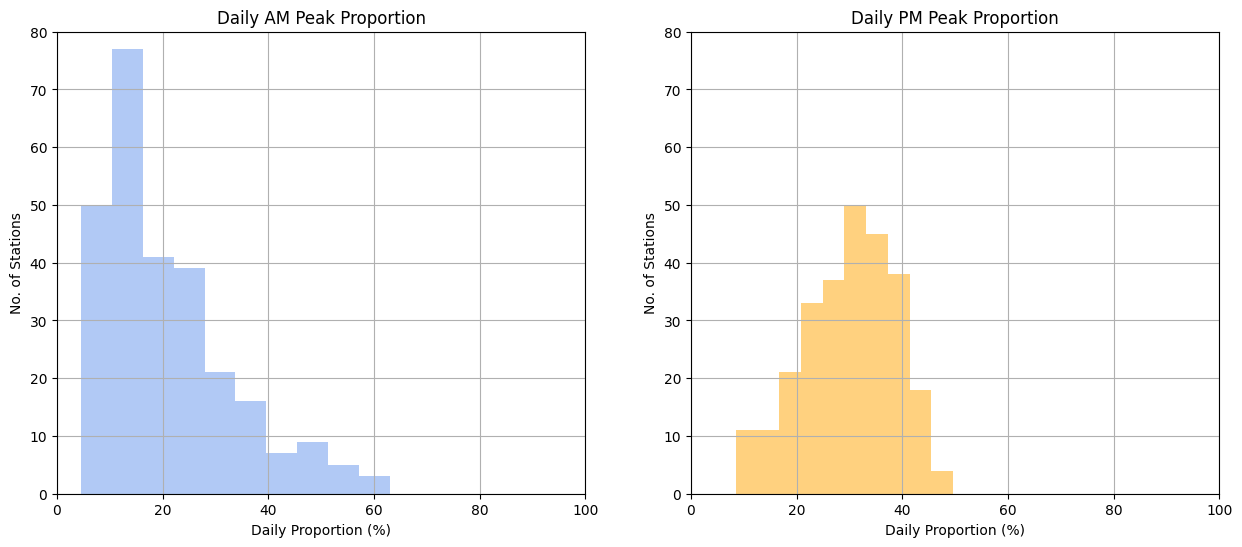

In [10]:
# creating the plots and setting their sizes, here I created an arrangement of 1 by 2 so you can view both next to eachother. 
fig, ax = plt.subplots(1, 2, figsize = (15,6))

# Assigning AMProportion to the first location.
amprop = plt.subplot(1,2,1)

# Plotting the AM histogram. Alpha is not necessary, but it lightens the colour which looks nicer in my opinion.
amprop = peak_counts['AMProportion'].hist(facecolor = 'cornflowerblue', alpha = 0.5, bins = 10)
# plotting labels.
plt.title('Daily AM Peak Proportion')
plt.xlabel('Daily Proportion (%)')
plt.ylabel('No. of Stations')

# setting x and y bounds for AM hist.
amprop.set_xbound(0,100)
amprop.set_ybound(0,80)

# Assigning PMProportion to the second location.
pmprop = plt.subplot(1,2,2)

# Plotting the PM histogram. Alpha is not necessary, but it lightens the colour which looks nicer in my opinion.
pmprop = peak_counts['PMProportion'].hist(facecolor = 'orange', alpha = 0.5, bins = 10)
plt.title('Daily PM Peak Proportion')
plt.xlabel('Daily Proportion (%)')
plt.ylabel('No. of Stations')

# setting x and y bounds for PM hist.
pmprop.set_xbound(0,100)
pmprop.set_ybound(0,80)

These two histograms show the number of stations down the left hand side as well as their respective peak proportion over the entire day on the X axis.

### Breaking down these visualisations
#### AM Peak Proportions:
 - AM peak time proportions seem to have a strong positive skew. It has an asymmetric distribution with 1 peak to the dataset.
 - Most underground stations in London have a relatively low proportion(%) of exits during morning peak times in comparison to the rest of the day, the most common result lying between 10%-16% exit makeup over the entire day.
 - 60%+ of exits are made during the AM peak time at around 3 stations in London over the course of a day. These are amongst the highest AM Peak Proportions in London, which leads me to believe that these areas are only visited for very particular reasons, e.g. work, as there are little to no other exits made at other times of the day at that station.
 - 4-10% of exits are made during the AM peak time at around 50 stations in London over the course of a day. These are the least AM Proportion exits in London, leading me to believe that this accounts for mostly stations located in residential areas which have little to no desire to be visited during morning peak hours.
 - The Daily Proportion of exits seems to be generally low, however the data tails off into higher exit proportions.
 
#### PM Peak Proportions:
 - PM peak time proportions seem to have a relatively symmetrical/ normal distribution to the dataset. There is only one peak and the data points are more evenly distributed, the peak is lower than that of AM Peak Proportions.
 - Most underground stations in London log exits which make up about 30-34% of their daily exits during evening peak hours, this is relatively high as it only makes up for 3 hours of the day. To me, this indicates underground stations are used for numerous reasons rather than more or less a sole reason. For example: people going back home after spending a day out in London alongside people coming back home from work.
 - 30-34% of daily exits are made during the PM peak hours at around 50 stations in London over the course of a day. This is the most common result(Mode).
 - The highest proportion of daily exits made during PM Peak hours is roughly 50% at around 4 stations in London.
 - The lowest proportion of daily exits made during PM Peak hours is roughly 10%-18% at around 11 stations in London.
 
Below, both proportions have been plotted on the same figure allowing us to compare distributions and findings.

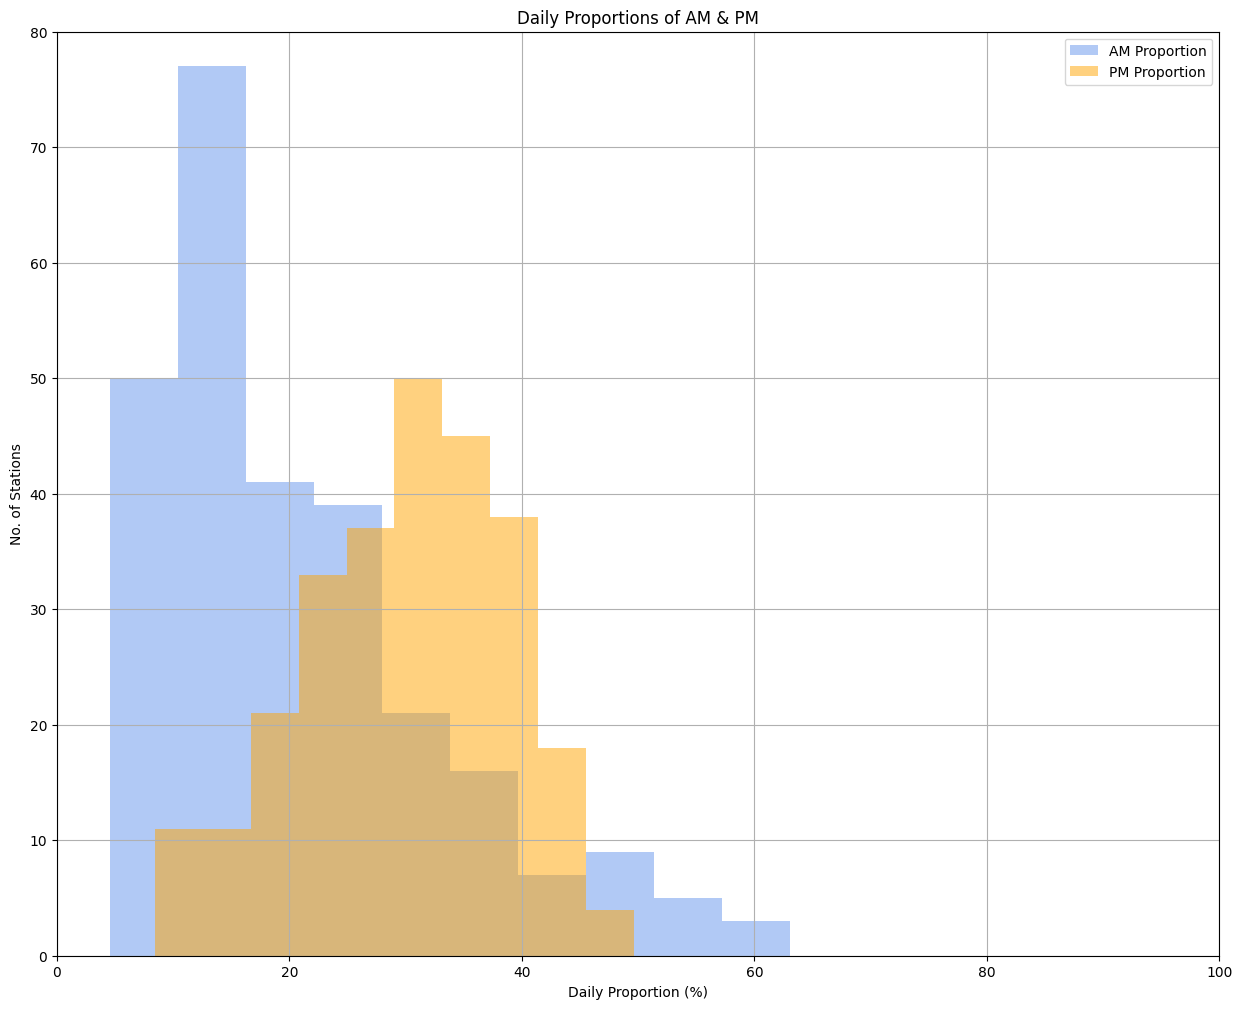

In [11]:
# creating a singular figure for both histograms to be plotted to.
fig, ax = plt.subplots(figsize = (15,12))

# plotting both histograms with colours representing AM or PM time. alpha used for transparency so you could see both histograms at all times.
# bins set to 10, I didnt see the need to go any higher as this portrays the graphs well enough.
peak_counts['AMProportion'].hist(facecolor = 'cornflowerblue', alpha = 0.5, bins = 10, label = 'AM Proportion')
peak_counts['PMProportion'].hist(facecolor = 'orange', alpha = 0.5, bins = 10, label = 'PM Proportion')

# setting custom X and Y bounds to better fit the results, X set to 100 so reader understands the proportion out of 100%.
ax.set_xbound(0,100)
ax.set_ybound(0,80)

plt.title('Daily Proportions of AM & PM')
plt.xlabel('Daily Proportion (%)')
plt.ylabel('No. of Stations')
plt.legend()
# some execution text was showing up so I used .show() to show only what is important.
plt.show()

### Comparing AM & PM from the Histogram above...

We could say that:
 - The distributions of AM proportions is greater than PM Proportions, such that when you go to a station in London during AM Peak times, the stations are generally less busy in proportion to the rest of the day. 
 - There is a chance that the station you go to might be significantly busier during the AM Peak times more than any other station at a certain day.
 - You are more likely to find stations less busy proportional to the rest of the day during AM Peak times in comparison to PM Peak times.
 - Generally, you could say that stations in london during PM Peak Hours can be found more consistantly busy in proportion to the rest of the day.

To get a better idea of the distributions, box plots and statistical information has been derived to further understand distributions, and possibly identify outliers.

### Box Plots

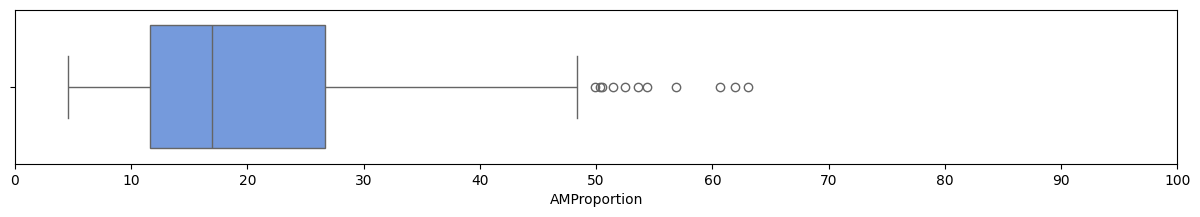

In [12]:
# creating a figure, and configuring its size to minimise wasted space, only displaying what is needed in an approporiate proportion.
# width matches the histograms, so you can look at both proportionally.
fig, ax = plt.subplots(figsize=(15,2))
# using seaborn libraries to plot a box plot with a specified colour representing AM.
# x axis set to 100 to view it as a proportion of 100%
ax = sns.boxplot(x='AMProportion', data = peak_counts, color='cornflowerblue', ax = ax).set(xlim=(0,100))

#originally, the ticks were not frequent enough, so I changed the frequency of ticks manually to make it easier to read the box plot.
x_ticks = np.arange(0, 101, 10)
plt.xticks(x_ticks)
# some execution text was showing up, the .show() hides un-neccessary text.
plt.show()

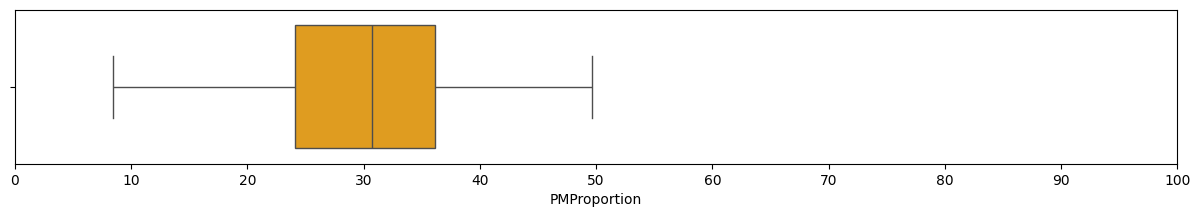

In [13]:
fig, ax1 = plt.subplots(figsize=(15,2))
# using seaborn libraries to plot a box plot with a specified colour representing PM.
# x axis set to 100 to view it as a proportion of 100%
ax1 = sns.boxplot(x='PMProportion', data = peak_counts, color='orange', ax = ax1).set(xlim=(0,100))

#originally, the ticks were not frequent enough, so I changed the frequency of ticks manually to make it easier to read the box plot.
plt.xticks(x_ticks)
# some execution text was showing up, the .show() hides un-neccessary text.
plt.show()

### Statistics & Deeper Analysis

In [14]:
#title and displaying the statistics using .describe()
print("AM Proportion Statistics:\n")
peak_counts['AMProportion'].describe()

AM Proportion Statistics:



count    268.000000
mean      20.712799
std       12.216077
min        4.530000
25%       11.612500
50%       16.940000
75%       26.645000
max       63.040000
Name: AMProportion, dtype: float64

In [15]:
#title and displaying the statistics using .describe()
print("PM Proportion Statistics:\n")
peak_counts['PMProportion'].describe()

PM Proportion Statistics:



count    268.000000
mean      29.875112
std        8.772510
min        8.460000
25%       24.097500
50%       30.735000
75%       36.160000
max       49.610000
Name: PMProportion, dtype: float64

#### the boxplots further reinforce our findings from the histograms as well as providing us with additional details. 
##### We can use the boxplots for a general idea and a visual representation whilst looking at the numbers provided by the statistical analysis of the dataset.

#### From the plots & statistics above, we can say:
 - The PM Proportions distribution generally has a greater average result than AM Proportions, meaning most stations tend to be busier in the evenings than they are in the mornings. Cross referencing with the statistics shows that proportional exits in the PM are greater than those made in the AM (a low of 8.5 in PM in comparison to a low of 4.5 in AM, a mean of 29.8 in PM in comparison to 20.7 in AM, a median of 30.7 in PM in contrast to 16.9 in AM).
 - The PM Proportion distribution has a smaller range. Using the statistics as reference, we can reinforce this statement by looking at the standard deviation of the data, which appears to be higher in the AM Proportion Statistics(12.2) in contrast to the PM Proportion Statistics(8.8) where the lower the SD, the tighter the distribution. 
 - the shape of the box plots indicate that the PM Proportion has a symmetrical distribution whereas the AM Proportion has a positive skew, this is because the upper quartile from the median value is dis-proportionate to the lower quartile from the median value in the AM Proportion.
     - AM Proportion: (Upper Quartile - Median) 26.6 - 16.9 = 9.7
     - AM Proportion: (Median - Lower Quartile) 16.9 - 11.6 = 5.3
     - as you can tell, there is quite a difference between the distance of both quartiles from the median meaning there is a skew. (4.4)
 - some of the highest daily proportions occur during AM Peak times where the maximum proportion was recorded making up 63% of total daily exits at some stations in comparison to a maximum record of 49% during PM Peak hours.
 - Though AM Peak times can be extremely high in daily exits proportions, it is important to note that these are considered outliers of the dataset when looking at the box plots. Where the box plot actually indicates that real values, which fall within the standard deviation of the dataset, lie is actually lower than the maximum considered within the standard deviance of the PM Proportion(roughly 48% highest AM Proportion within standard deviance in comparison to PM's 49.6%)
 
 
## Part 3 - Categorisation Through Statistical Information.

As hinted earler, patterns of exit times and locations in which these events occur can tell a more than just graphs, but a story. In this segment, we will focus on the Northern Line in london, which connects several stations going through different areas.

we will be using the proportion of exits in each area to predict / evaluate whether the area under inspection functions as a residential area, a work area or other.

### What is our hypothosis?
 - Work areas often have high proportion of exits at stations nearby during the morning, where people have been commuting from one place to another to get to their work place.
 - Residential areas often have a high proportion of exits at stations nearby during the evening, when people have finished work and/or are getting back home after a day out.
 - Other areas include areas of touristic interest, where no significant pattern is spotted. People could go there to shop or perform other social activities.
 
Starting off this analysis, I have stripped away the stations which are located on the Northern Line and presented them in their individual dataframe, below is the result.


In [16]:
# creating a dataframe derived from peak counts, which only includes stations along the northern line.
northern_line = peak_counts.loc[['Archway','Balham', 'Embankment', 'Goodge Street', 'Highgate', 'High Barnet', 
                                 'Leicester Square', 'Morden', 'South Wimbledon', 'Tottenham Court Road', 'Warren Street']]
# printing the northern line.
northern_line

,AMPeak,PMPeak,DailyExits,AMProportion,PMProportion,Difference,Ratio
Station,,,,,,,
Archway,2190,4106,13935,15.72,29.47,-1916,0.53
Balham,2637,7635,22128,11.92,34.50,-4998,0.35
Embankment,10692,8829,33781,31.65,26.14,1863,1.21
Goodge Street,5374,1949,12817,41.93,15.21,3425,2.76
Highgate,893,3170,8921,10.01,35.53,-2277,0.28
High Barnet,987,2362,6843,14.42,34.52,-1375,0.42
Leicester Square,8952,12915,47772,18.74,27.03,-3963,0.69
Morden,1550,5955,15680,9.89,37.98,-4405,0.26
South Wimbledon,1335,2198,7197,18.55,30.54,-863,0.61


### Testing our hypothesis

taking the proportions of each station, a bar char has been plotted below comparing the AM and PM Proportions in percent(%). This should give us a better understanding of the proportions before categorising each station to an area type.


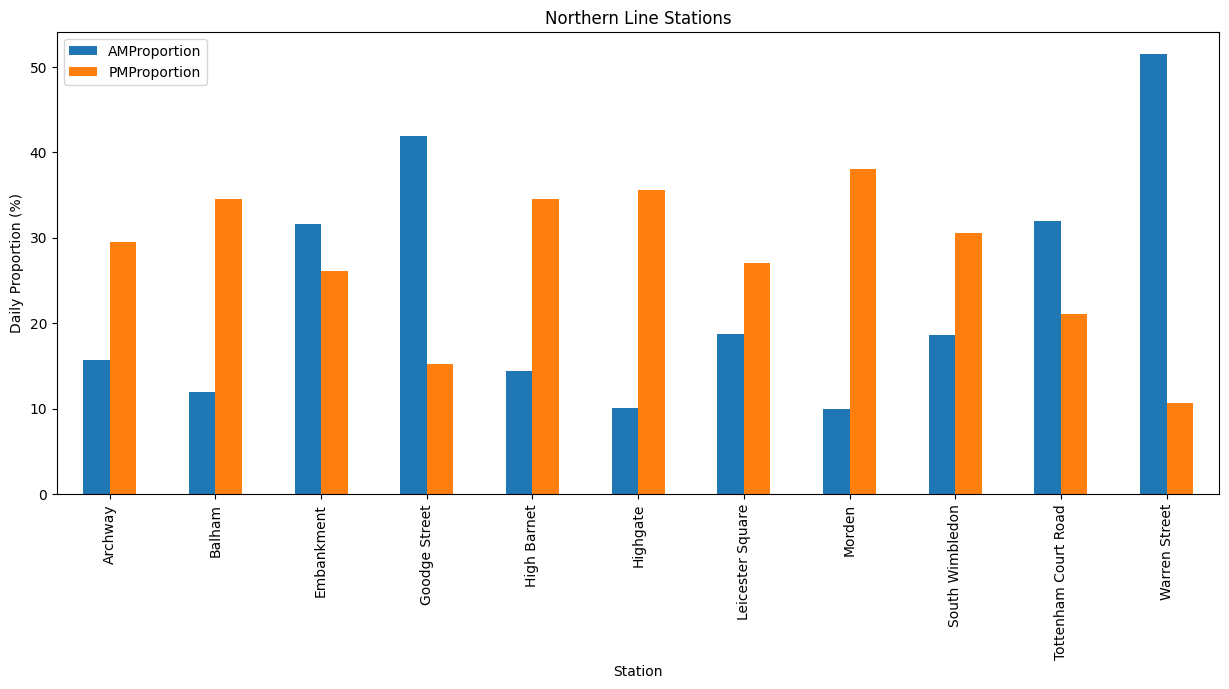

In [17]:
#creating a pivot table with only am and pm proportions to plot a bar graph comparing both values for each station.
p1 = northern_line.pivot_table(index = ['Station'], values = ['AMProportion', 'PMProportion'])
p1.plot(kind="bar",figsize=(15, 6)).set_title('Northern Line Stations')
plt.ylabel('Daily Proportion (%)')
plt.show()

From the chart above, we can see a variety of results, most indicating that Residential areas lie on the Northern line, with places such as Goodge Street and Warren Street standing out as obvious industrial / work based areas. Some results I would expect to return other would be Embankment, which is close to Big Ben, one of UK's biggest attractions and Leicester Square, which lies in the center of London, providing food and shopping facilities as well as space for street performers.

### Calculating the margin between proportions to determine whether an area can be categorised as Work, Residential or other.

I have chosen to compare the Proportion of exits in the AM and PM of each station. The calculation is as follows:

 - For each station, calculate whether the opposing proportion is within 25% of its range, this is done by subtracting 25% of the proportion we are using it and using > as a comparison operator.

 - If AM is still greater than PM, categorise the station as Work.  

 - If PM is greater than AM, categorise the station as Residential. add a new dict value which takes the name of the station as key and adds value Residential.

 - Else, categorise the station as Other.  add a new dict value which takes the name of the station as key and adds value other.
 
### Below is the final dataframe categorising each station using the calculations demonstrated above.

In [18]:
# creating a Dict to hold area type values, which I could later add to my DataFrame.
area = {}


#calculation done as written in the document
for i in range(len(p1)):
    if p1['AMProportion'][i] - (p1['AMProportion'][i] * 0.25) > (p1['PMProportion'][i]) :
        # add a new dict value which takes the name of the station as key and adds value Work.
        areatype = {p1.index[i] : 'Work'}
        # Add this to the area dict we created.
        area.update(areatype)
    elif p1['PMProportion'][i] - (p1['PMProportion'][i] * 0.25) > (p1['AMProportion'][i]) :
        # add a new dict value which takes the name of the station as key and adds value Residential.
        areatype = {p1.index[i] : 'Residential'}
        # Add this to the area dict we created.
        area.update(areatype)
    else:
        # add a new dict value which takes the name of the station as key and adds value Other.
        areatype = {p1.index[i] : 'Other'}
        # Add this to the area dict we created.
        area.update(areatype)
        
'''''''''
I could have used ratio > 1.25, 
    areatype = work , 
ratio < 0.75
    areatype = resi ,
else
    areatype = other
    
however, I did not want to keep creating additional dataframes or pivot tables to serve particular functions
so I just used proportions instead.
'''''''''

# can use below if you wanted to look at only the station and its corresponding value.
#areatypes = pd.DataFrame()
#areatypes = areatypes.assign(Station = area.keys(), AreaType = area.values()).set_index('Station')
#areatypes

#printing the outcome as part of the northern_line dataframe. Comment this out and uncomment the 
# above to see just the area type alongside the station.
northern_line.assign(AreaType = area.values())

/var/folders/38/x7fpd5cs6jbbv_k7n0xp767r0000gn/T/ipykernel_7902/1728244833.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if p1['AMProportion'][i] - (p1['AMProportion'][i] * 0.25) > (p1['PMProportion'][i]) :
/var/folders/38/x7fpd5cs6jbbv_k7n0xp767r0000gn/T/ipykernel_7902/1728244833.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif p1['PMProportion'][i] - (p1['PMProportion'][i] * 0.25) > (p1['AMProportion'][i]) :


,AMPeak,PMPeak,DailyExits,AMProportion,PMProportion,Difference,Ratio,AreaType
Station,,,,,,,,
Archway,2190,4106,13935,15.72,29.47,-1916,0.53,Residential
Balham,2637,7635,22128,11.92,34.50,-4998,0.35,Residential
Embankment,10692,8829,33781,31.65,26.14,1863,1.21,Other
Goodge Street,5374,1949,12817,41.93,15.21,3425,2.76,Work
Highgate,893,3170,8921,10.01,35.53,-2277,0.28,Residential
High Barnet,987,2362,6843,14.42,34.52,-1375,0.42,Residential
Leicester Square,8952,12915,47772,18.74,27.03,-3963,0.69,Residential
Morden,1550,5955,15680,9.89,37.98,-4405,0.26,Residential
South Wimbledon,1335,2198,7197,18.55,30.54,-863,0.61,Residential


Above are the results of my categorisation attempt. I think they worked out well, however it did miss out Leicester Square, which is definitely not a primarily residential area. However, I think due to the facilities it provides such as entertainment, food, drink, casino and other, and the location may be visited commenly by workers after they have finished as it could be a good way to spend an evening with colleagues. This is something my calculations could not predict at its current state. 

I think the rest of the data has been represented accurately. looking at the stations which fall on the northern line, it seems Morden and High Barnet fall right on the end of each side of the line which means they are more than likely residential areas. They seem to have been represented appropriately. 

Embankment does show up under 'Other' which is to be expected considering it's location, but this also proves that the 'Other' category is working respectively, but is not as accurate as I might want it to be.

Overall, I think that in order to improve this statistical analysis, we could add:
 - London Zones into the dataframe, identifying the location of each station by zone. 
 - We could identify each station by allocated lines, taking into account stations which have overlapping lines.
 - We could also specifically identify areas located near tourist attractions and landmark, which would be hard to identify specifically otherwise as they may count as 'anomalies' in the dataset. 

Through all this data, a more accurate prediction can be made on the type of area the station is located in, and more interesting patterns could be identified within the dataset. This data could also be used to try and identify whether a station is large or small depending on the amount of lines passing through it, the amount of exits made over the entire day and the zone it is located in.